In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\PC\\Data Science\\Data Analysis\\Time Series Analysis\\Projects\\Monthly Gold Forecast\\Dataset\\gold_monthly.csv')

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.shape

(847, 2)

In [5]:
print(f"Data range of gold prices available from  {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from  1950-01 to 2020-07


In [6]:
date = pd.date_range(start = '1/3/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [7]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


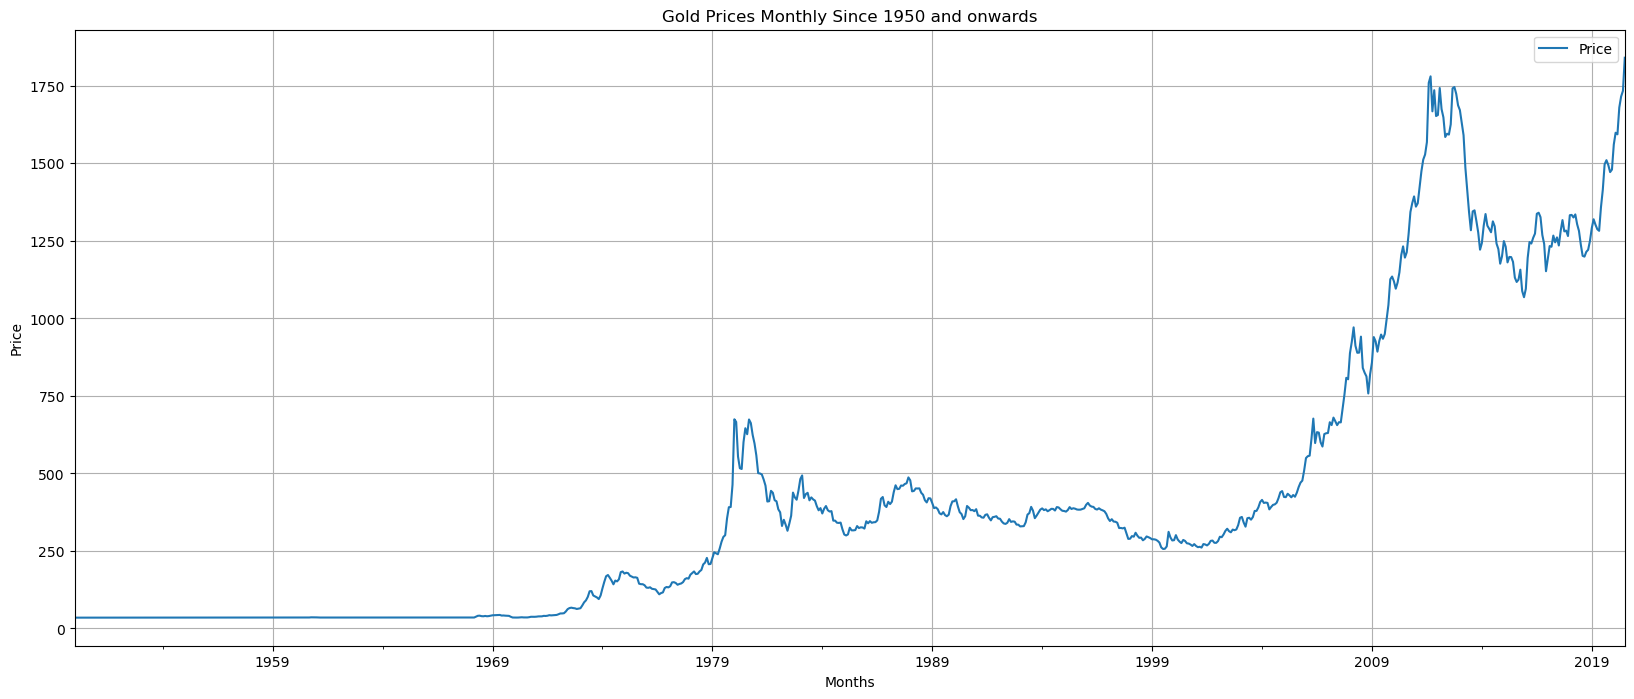

In [8]:
df.plot(figsize = (20,8))
plt.title('Gold Prices Monthly Since 1950 and onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

In [9]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


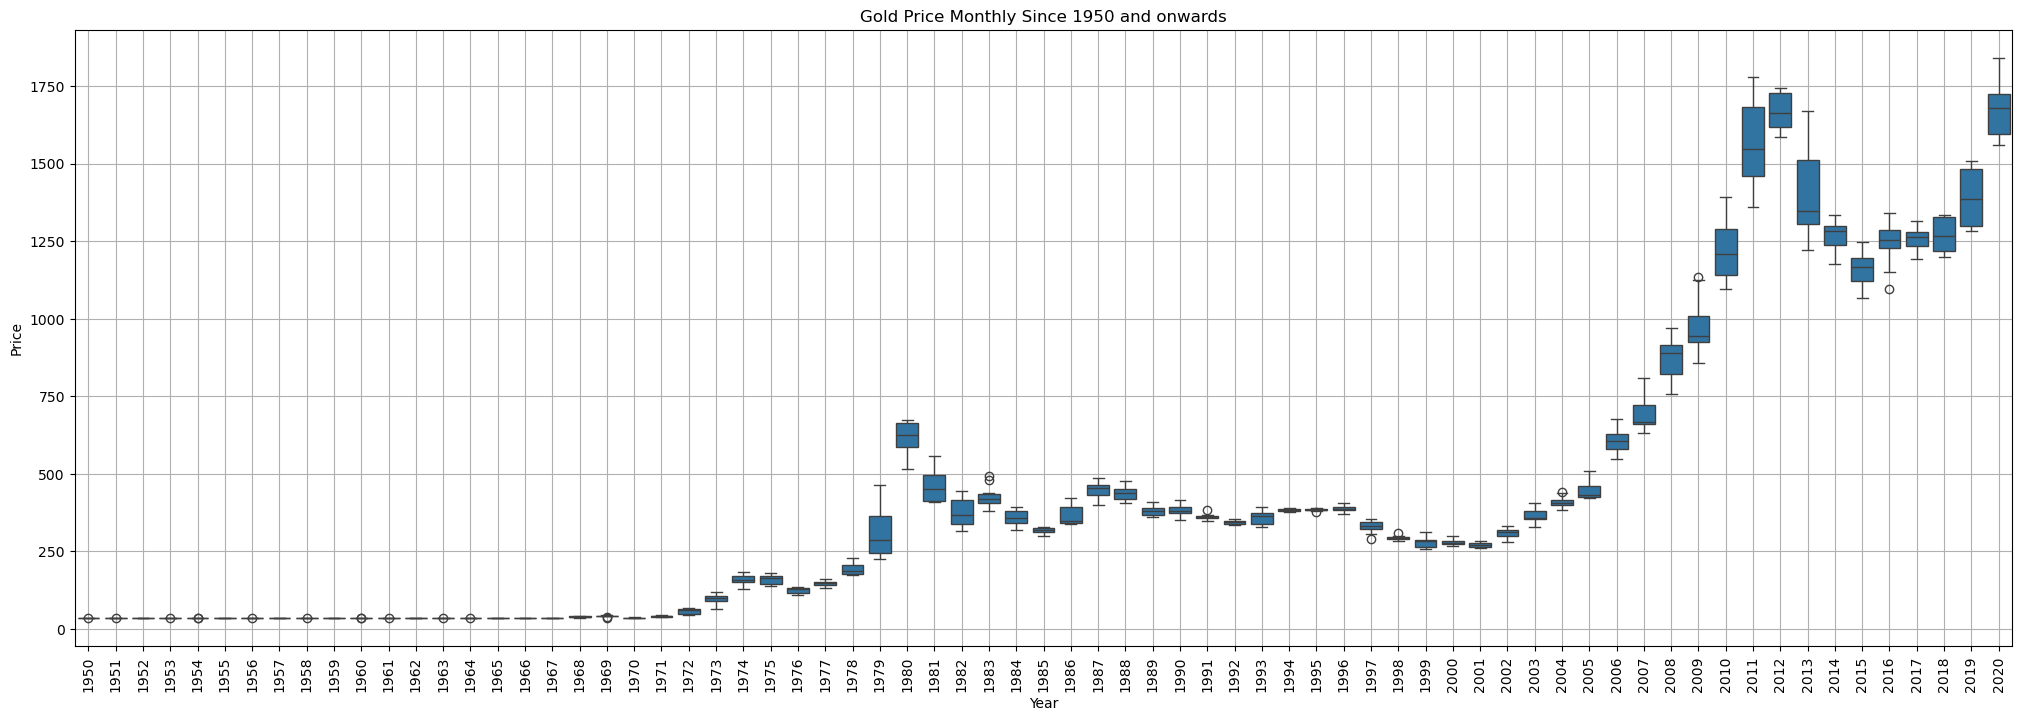

In [10]:
_, ax = plt.subplots(figsize = (25,8))
sn.boxplot(x = df.index.year, y = df.values[:,0], ax = ax)
plt.title('Gold Price Monthly Since 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')

plt.xticks(rotation = 90)
plt.grid();

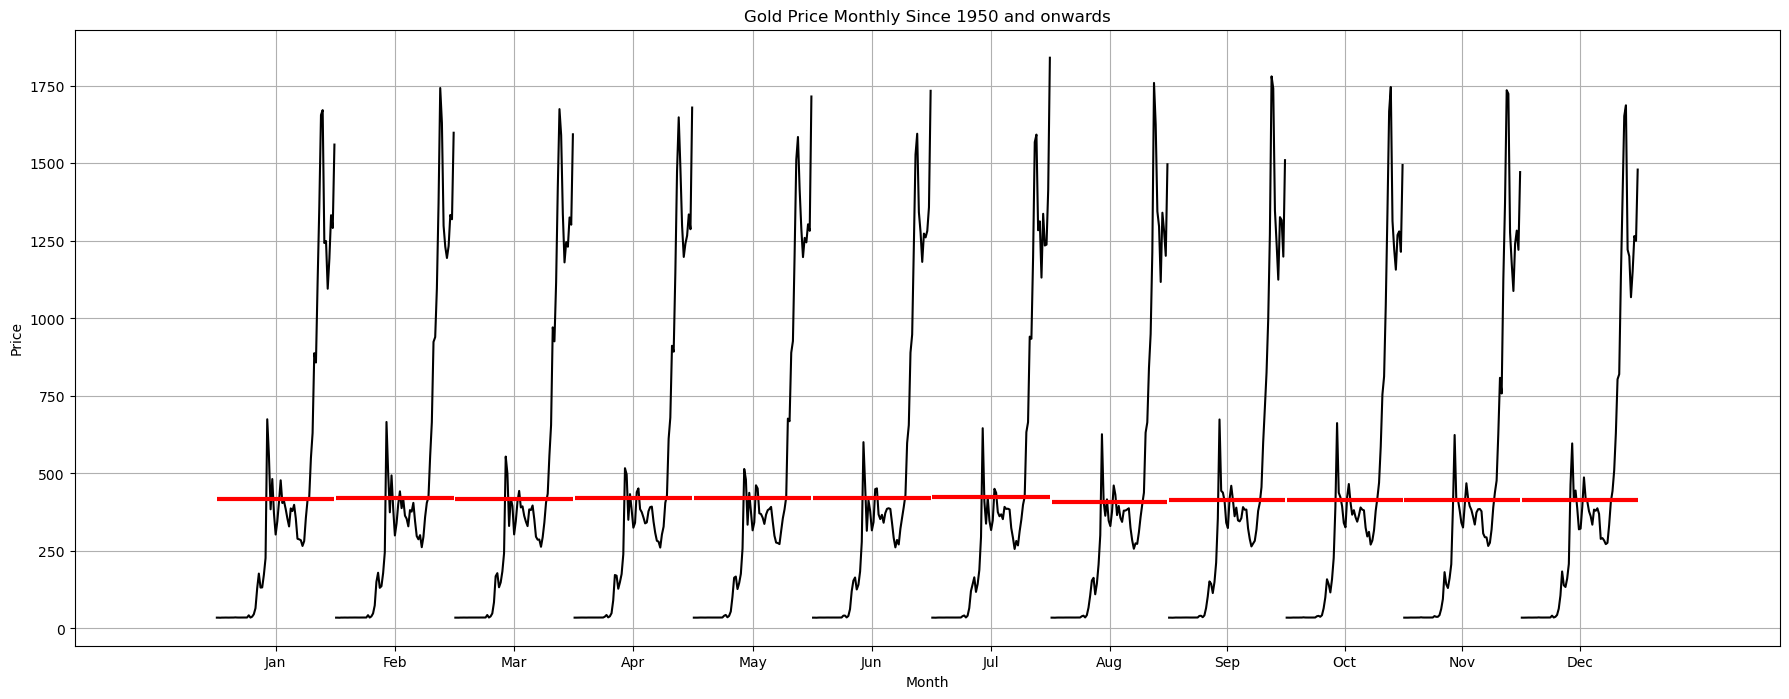

In [11]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22, 8))
month_plot(df, ylabel = 'Gold Price', ax = ax)
plt.title('Gold Price Monthly Since 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid();

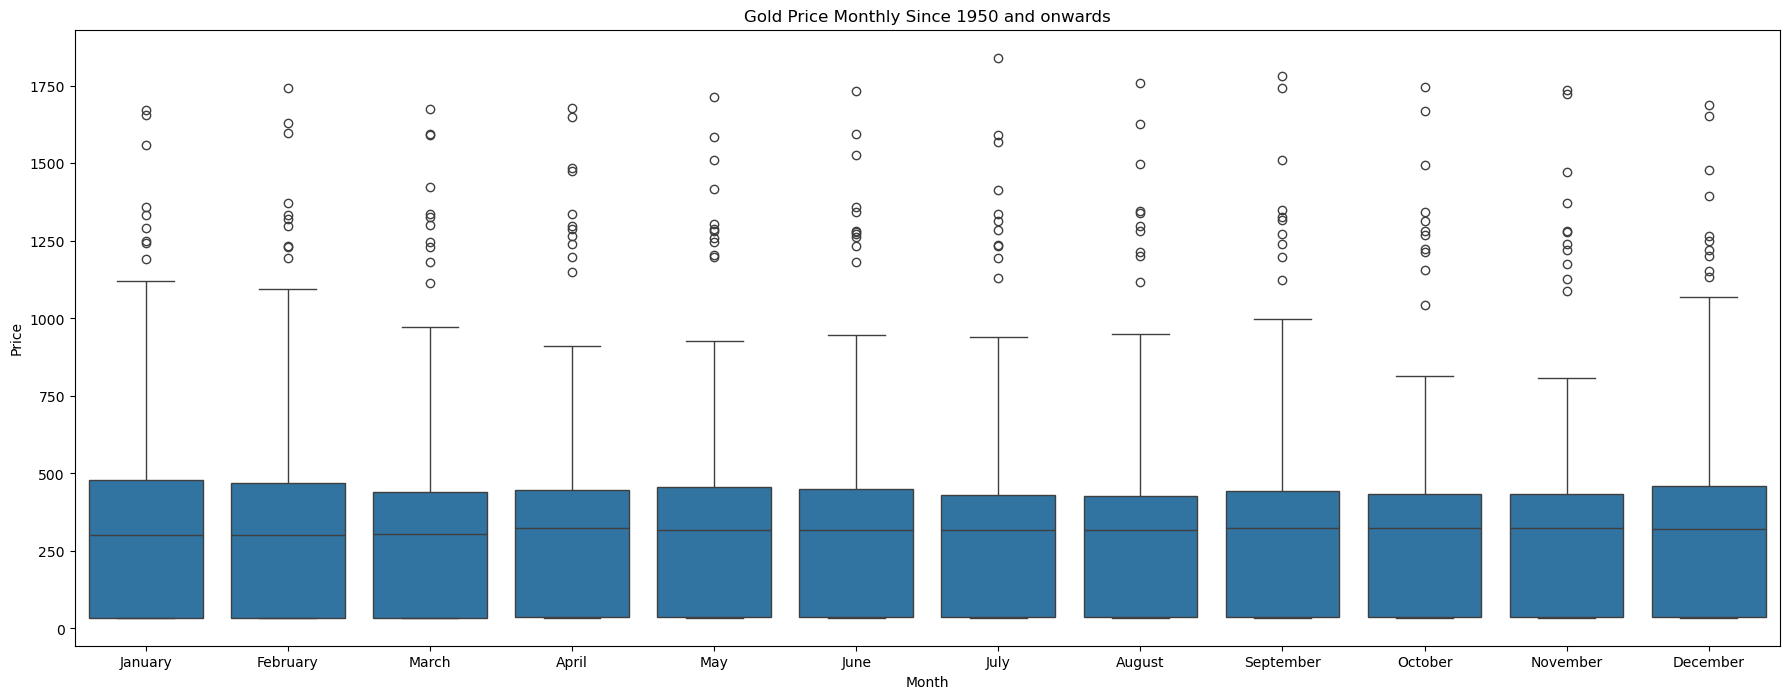

In [12]:
_, ax = plt.subplots(figsize = (22, 8))
sn.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)
plt.title('Gold Price Monthly Since 1950 and onwards')

plt.xlabel('Month')
plt.ylabel('Price')

plt.show()

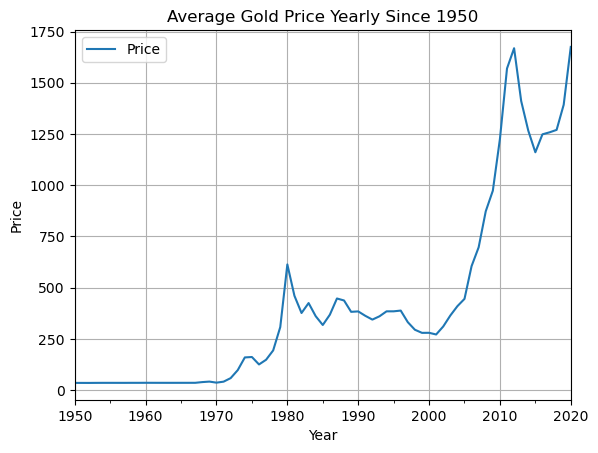

In [13]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average Gold Price Yearly Since 1950')

plt.xlabel('Year')
plt.ylabel('Price')

plt.grid();

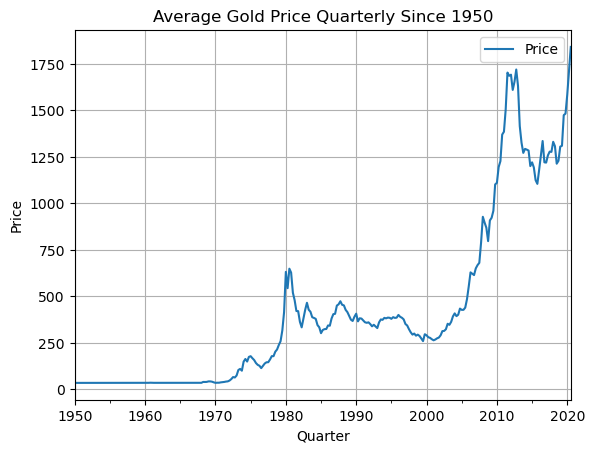

In [14]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()

plt.title('Average Gold Price Quarterly Since 1950')

plt.xlabel('Quarter')
plt.ylabel('Price')

plt.grid();

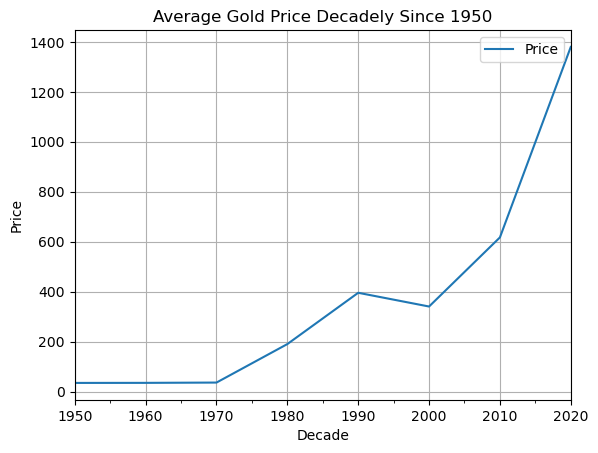

In [15]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()

plt.title('Average Gold Price Decadely Since 1950')

plt.xlabel('Decade')
plt.ylabel('Price')

plt.grid();

In [42]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})

# Corrected the placement of the closing parenthesis for the merge function
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)

df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
